In [3]:
import sys
sys.path.append('../..')
import ugent

import matplotlib.pyplot as plt
import matplotlib as mpl

In [197]:
from pyslise import PyslisePeriodic, Pyslise
from math import pi

def V(x):
    return 3*x*x*(pi-x)

periodic = PyslisePeriodic(V, 0, pi, tolerance=1e-14)
forward = Pyslise(V, 0, pi, tolerance=1e-14)

eigs = periodic.eigenvaluesByIndex(0, 10)
print(eigs)

[(0, 4.3018482904455375, 1), (1, 11.075846483818362, 1), (2, 14.031553319790294, 1), (3, 24.047387349500138, 1), (4, 24.189738198817437, 1), (5, 43.86049447489741, 1), (6, 43.9586891894956, 1), (7, 71.80848955773388, 1), (8, 71.8708988995195, 1), (9, 107.78659112882627, 1)]


In [195]:
import numpy as np
from math import sin, cos

Es = np.linspace(-2, 30, 400)
alphas = np.linspace(0, pi, 400) + 0.01

m = forward.__sector(forward.__matchIndex).min


data = np.array([
    [
        forward.propagate(E, (sin(alpha), cos(alpha)), 0, m)[1] - forward.propagate(E, (sin(alpha), cos(alpha)), pi, m)[1] for E in Es
    ] for alpha in alphas
])

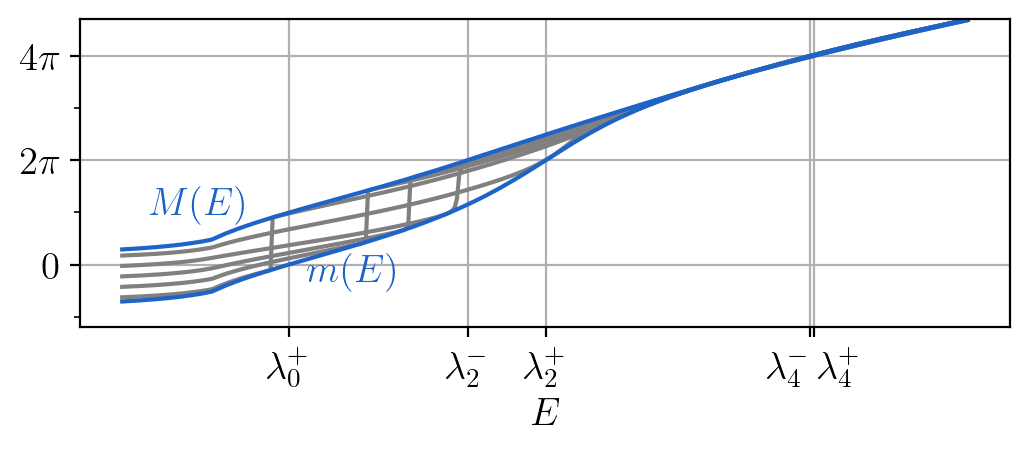

In [235]:
skip = len(alphas) // 5

fig, ax = plt.subplots(1,1, figsize=(6, 2), dpi=200)

for alpha, theta in zip(alphas[::skip], data[::skip]):
    ax.plot(Es, theta, color="gray")

ax.set_yticks([0, 2*pi, 4*pi])
ax.set_yticks([-pi, pi, 3*pi], minor=True)
ax.set_yticklabels(["$0$", "$2\\pi$", "$4\\pi$"])
ax.set_ylim(-1.2*pi, 4.7*pi)
ticks = []
for i, E, m in eigs[:5]:
    ticks.append(E)
ax.set_xticks(ticks)
ax.set_xticklabels(["$\\lambda_0^+$", "$\\lambda_2^-$", "$\\lambda_2^+$", "", "$\\lambda_4^- \\, \\lambda_4^+$"])
ax.grid(axis="x", which="major")
ax.grid(axis="y", which="major")
ax.text(-1, 3, "$M(E)$", color=ugent.blauw)
ax.text(5, -1, "$m(E)$", color=ugent.blauw)
ax.set_xlabel("$E$")
    
ax.plot(Es, np.min(data, axis=0), color=ugent.blauw)
ax.plot(Es, np.max(data, axis=0), color=ugent.blauw)
plt.savefig("periodic_minmax.pdf", bbox_inches="tight")